In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency as chi2_contingency
import seaborn as sns

In [2]:
impact_env = pd.read_csv("Impact_environnemental_final.csv", sep ="\t")
qlte_nutri = pd.read_csv("Qualite nutritionnelle_final.csv", sep ="\t")

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_13084\1556617207.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  impact_env = pd.read_csv("Impact_environnemental_final.csv", sep ="\t")
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_13084\1556617207.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  qlte_nutri = pd.read_csv("Qualite nutritionnelle_final.csv", sep ="\t")


In [3]:
# les deux tableaux ont le même nombre de lignes
# on supprime les doublons des deux dataframes
impact_env.drop_duplicates(inplace = True)
qlte_nutri.drop_duplicates(inplace = True)

In [4]:
nb_prodmarques2 = impact_env['brands_tags'].value_counts()
nb_prodmarques2

brands_tags
carrefour                                    11308
auchan                                       10476
u                                             6422
casino                                        4718
leader-price                                  4456
                                             ...  
simpl                                            1
reflets-de-francebazin-andre                     1
en-cuisine,interdis                              1
produits-blancs,interdis,simply,carrefour        1
vitaflor,milical                                 1
Name: count, Length: 58298, dtype: int64

In [6]:
marques_ecoscore = impact_env[["brands_tags", "ecoscore_grade"]].groupby("brands_tags").count().sort_values("ecoscore_grade", ascending=False)
marques_ecoscore.head(20)

,ecoscore_grade
brands_tags,
carrefour,11305
auchan,10476
u,6422
casino,4718
leader-price,4456
cora,3407
picard,2775
le-gaulois,2626
nestle,2592


In [4]:
# Quelles sont les marques qui jouent le jeu et affichent le nutriscore ? Lesquelles ne le font pas?

In [5]:
qlte_nutri.columns

Index(['code', 'product_name', 'quantity', 'brands_tags', 'countries_tags',
       'serving_size', 'image_url', 'ingredients_tags', 'nutriscore_grade',
       'energy-kcal_100g', 'fat_100g', 'saturated-fat_100g', 'sugars_100g',
       'proteins_100g', 'salt_100g', 'nb_nocif'],
      dtype='object')

In [4]:
# nbre de produits par marque
#=> pour faire ensuite proportion de produits avec nutriscore par marques
nbre_prodmarques = qlte_nutri['brands_tags'].value_counts()
nbre_prodmarques = pd.DataFrame(nbre_prodmarques)
nbre_prodmarques

,count
brands_tags,
carrefour,11719
auchan,10685
u,6428
casino,4726
leader-price,4461
...,...
carrefour-nids,1
"lager,carrefour",1
"carrefour,carefour-market,carefour-city",1


In [ ]:
# tri 

In [5]:
# ligne de Raphaël pour le nombre de produits par marques qui ont un nutriscore
marques_nutriscore = qlte_nutri[["brands_tags", "nutriscore_grade"]].groupby("brands_tags").count().sort_values("nutriscore_grade", ascending=False)
marques_nutriscore

,nutriscore_grade
brands_tags,
auchan,6851
carrefour,6345
u,4466
casino,3242
leader-price,3080
...,...
"knorr,unilever,knorr-schmeck-die-welt",0
"knorr,moments-gourmets,unilever",0
"knorr,knorr-professional",0


In [7]:
# merge nbre_prodmarques et marques_nutriscore
prod_brands_nutrisc = pd.merge(nbre_prodmarques,marques_nutriscore, on = 'brands_tags', how= 'outer', indicator = True)
prod_brands_nutrisc

,count,nutriscore_grade,_merge
brands_tags,,,
carrefour,11719,6345,both
auchan,10685,6851,both
u,6428,4466,both
casino,4726,3242,both
leader-price,4461,3080,both
...,...,...,...
carrefour-nids,1,0,both
"lager,carrefour",1,0,both
"carrefour,carefour-market,carefour-city",1,1,both


In [8]:
prod_brands_nutrisc['Pourcent_prod_nutriscore'] = prod_brands_nutrisc["nutriscore_grade"] / prod_brands_nutrisc["count"] * 100
prod_brands_nutrisc

,count,nutriscore_grade,_merge,Pourcent_prod_nutriscore
brands_tags,,,,
carrefour,11719,6345,both,54.142845
auchan,10685,6851,both,64.117922
u,6428,4466,both,69.477287
casino,4726,3242,both,68.599238
leader-price,4461,3080,both,69.042816
...,...,...,...,...
carrefour-nids,1,0,both,0.000000
"lager,carrefour",1,0,both,0.000000
"carrefour,carefour-market,carefour-city",1,1,both,100.000000


In [11]:
prod_brands_nutrisc.sort_values("Pourcent_prod_nutriscore", ascending = False)

,count,nutriscore_grade,_merge,Pourcent_prod_nutriscore
brands_tags,,,,
fiandino,1,1,both,100.0
"le-rendez-vous-des-gourmets,rendez-vous",1,1,both,100.0
solior,1,1,both,100.0
chips-de-l-aveyron,2,2,both,100.0
emile-afchain,1,1,both,100.0
...,...,...,...,...
bourgogne-gourmande,2,0,both,0.0
sd,2,0,both,0.0
peyre,2,0,both,0.0


In [8]:
# essai de fonction pour déterminer, pour chaque marque, la proportion de produits
# avec nutriscore parmi la totalité des produits
def pourc_prod_nutri(cell):
    
        return 

qlte_nutri['Pourcent_prod_nutriscore'] = qlte_nutri[''].map(pourc_prod_nutri)

KeyError: 'Produit'

In [19]:
# Merger les tableaux impact_env et qlte_nutri sur la colonne 'code'
#=> celle où il n'y a pas de valeurs manquantes
IEnv_QNutri = pd.merge(impact_env,qlte_nutri, on = 'code', how= 'outer', indicator = True)
IEnv_QNutri

,code,product_name_x,quantity_x,brands_tags_x,countries_tags_x,serving_size_x,image_url_x,ecoscore_grade,est_plastique,est_palm,...,ingredients_tags,nutriscore_grade,energy-kcal_100g,fat_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,nb_nocif,_merge
0,00000000000026772226,Skyr,480 g,danone,en:france,NaN,https://images.openfoodfacts.org/images/produc...,d,False,False,...,NaN,a,57.0,0.2,0.10,3.9,10.0,0.09,0.0,both
1,0000000000017,Vitória crackers,NaN,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,unknown,False,False,...,NaN,NaN,375.0,7.0,3.08,15.0,7.8,1.40,0.0,both
2,0000000000031,Cacao,130 g,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,unknown,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,both
3,0000000000100,moutarde au moût de raisin,100g,courte-paille,en:france,NaN,https://images.openfoodfacts.org/images/produc...,c,False,False,...,fr:eau-graines-de-teguments-de-moutarde-vinaig...,d,NaN,8.2,2.20,22.0,5.1,4.60,0.0,both
4,0000000000123,Sauce Sweety chili 0%,NaN,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,unknown,False,False,...,NaN,NaN,21.0,0.0,0.00,0.4,0.2,2.04,0.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942077,3760277720168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,right_only
942078,3760277770019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,270.0,23.0,15.29,1.3,15.1,1.08,0.0,right_only
942079,3760277830041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,right_only
942080,3760277830058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,right_only


In [20]:
#=> 14 à 16 lignes en plus...

# ENLEVER LES LIGNES DU DATAFRAME DONT LES CELLULES SONT VIDES DANS LES DEUX COLONNES DE MEME NOM
# identifier les cellules comportant des valeurs NaN dans les deux colonnes 'product_name_x' et 'product_name_y'
val_nan = IEnv_QNutri[(IEnv_QNutri['product_name_x'].isna()) & (IEnv_QNutri['product_name_y'].isna())].index
len(val_nan)

24380

In [21]:
# supprimer ces lignes
IEnv_QNutri.drop(val_nan, inplace=True)

In [22]:
# vérifier que le nombre de lignes enlevées correspond bien
IEnv_QNutri
# 917702 + 24380 = 942082 => c'est bon

,code,product_name_x,quantity_x,brands_tags_x,countries_tags_x,serving_size_x,image_url_x,ecoscore_grade,est_plastique,est_palm,...,ingredients_tags,nutriscore_grade,energy-kcal_100g,fat_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,nb_nocif,_merge
0,00000000000026772226,Skyr,480 g,danone,en:france,NaN,https://images.openfoodfacts.org/images/produc...,d,False,False,...,NaN,a,57.0,0.2,0.10,3.9,10.0,0.09,0.0,both
1,0000000000017,Vitória crackers,NaN,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,unknown,False,False,...,NaN,NaN,375.0,7.0,3.08,15.0,7.8,1.40,0.0,both
2,0000000000031,Cacao,130 g,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,unknown,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,both
3,0000000000100,moutarde au moût de raisin,100g,courte-paille,en:france,NaN,https://images.openfoodfacts.org/images/produc...,c,False,False,...,fr:eau-graines-de-teguments-de-moutarde-vinaig...,d,NaN,8.2,2.20,22.0,5.1,4.60,0.0,both
4,0000000000123,Sauce Sweety chili 0%,NaN,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,unknown,False,False,...,NaN,NaN,21.0,0.0,0.00,0.4,0.2,2.04,0.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942077,3760277720168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,right_only
942078,3760277770019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,270.0,23.0,15.29,1.3,15.1,1.08,0.0,right_only
942079,3760277830041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,right_only
942080,3760277830058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,right_only


In [23]:
# mêmes opérations avec les deux colonnes 'brands_tags_x' et 'brands_tags_y'
val_nan = IEnv_QNutri[(IEnv_QNutri['brands_tags_x'].isna()) & (IEnv_QNutri['brands_tags_y'].isna())].index
len(val_nan)

451971

In [24]:
# supprimer ces lignes
IEnv_QNutri.drop(val_nan, inplace=True)

In [25]:
# vérifier que le nombre de lignes enlevées correspond bien
IEnv_QNutri
# 465731 + 451971 = 917702 => c'est bon

,code,product_name_x,quantity_x,brands_tags_x,countries_tags_x,serving_size_x,image_url_x,ecoscore_grade,est_plastique,est_palm,...,ingredients_tags,nutriscore_grade,energy-kcal_100g,fat_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,nb_nocif,_merge
0,00000000000026772226,Skyr,480 g,danone,en:france,NaN,https://images.openfoodfacts.org/images/produc...,d,False,False,...,NaN,a,57.0,0.2,0.1,3.9,10.0,0.090,0.0,both
3,0000000000100,moutarde au moût de raisin,100g,courte-paille,en:france,NaN,https://images.openfoodfacts.org/images/produc...,c,False,False,...,fr:eau-graines-de-teguments-de-moutarde-vinaig...,d,NaN,8.2,2.2,22.0,5.1,4.600,0.0,both
15,0000000001199,Solène céréales poulet,NaN,crous,en:france,NaN,https://images.openfoodfacts.org/images/produc...,unknown,False,False,...,"en:antioxidant,en:colour,en:tomato,en:vegetabl...",NaN,219.0,5.9,0.5,1.7,9.7,0.464,0.0,both
16,0000000001281,Tarte noix de coco,NaN,"crous-resto,crous",en:france,NaN,https://images.openfoodfacts.org/images/produc...,unknown,True,False,...,NaN,d,381.0,22.0,15.5,21.9,4.6,0.100,0.0,both
20,0000000001663,Crème dessert chocolat,NaN,ferme-de-la-fremondiere,en:france,NaN,https://images.openfoodfacts.org/images/produc...,unknown,False,False,...,"en:whole-milk,en:dairy,en:milk,en:sugar,en:add...",NaN,0.0,0.0,0.0,0.0,0.0,0.000,0.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941979,3760275841254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,right_only
941984,3760275855206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"en:water,en:malted-barley,en:cereal,en:malt,en...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,right_only
942079,3760277830041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,right_only
942080,3760277830058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,right_only


In [26]:
# pas de cellules en commun vides pour les deux colonnes 'countries_tags_x' et 'countries_tags_y'
val_nan = IEnv_QNutri[(IEnv_QNutri['countries_tags_x'].isna()) & (IEnv_QNutri['countries_tags_y'].isna())].index
len(val_nan)

0

In [27]:
# mêmes opérations pour les deux colonnes 'image_url_x' et 'image_url_y'
val_nan = IEnv_QNutri[(IEnv_QNutri['image_url_x'].isna()) & (IEnv_QNutri['image_url_y'].isna())].index
len(val_nan)

39296

In [28]:
# supprimer ces lignes
IEnv_QNutri.drop(val_nan, inplace=True)

In [29]:
# vérifier que le nombre de lignes enlevées correspond bien
IEnv_QNutri
# 426435 + 39296 = 465731 => c'est bon

,code,product_name_x,quantity_x,brands_tags_x,countries_tags_x,serving_size_x,image_url_x,ecoscore_grade,est_plastique,est_palm,...,ingredients_tags,nutriscore_grade,energy-kcal_100g,fat_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,nb_nocif,_merge
0,00000000000026772226,Skyr,480 g,danone,en:france,NaN,https://images.openfoodfacts.org/images/produc...,d,False,False,...,NaN,a,57.0,0.2,0.1,3.9,10.0,0.090,0.0,both
3,0000000000100,moutarde au moût de raisin,100g,courte-paille,en:france,NaN,https://images.openfoodfacts.org/images/produc...,c,False,False,...,fr:eau-graines-de-teguments-de-moutarde-vinaig...,d,NaN,8.2,2.2,22.0,5.1,4.600,0.0,both
15,0000000001199,Solène céréales poulet,NaN,crous,en:france,NaN,https://images.openfoodfacts.org/images/produc...,unknown,False,False,...,"en:antioxidant,en:colour,en:tomato,en:vegetabl...",NaN,219.0,5.9,0.5,1.7,9.7,0.464,0.0,both
16,0000000001281,Tarte noix de coco,NaN,"crous-resto,crous",en:france,NaN,https://images.openfoodfacts.org/images/produc...,unknown,True,False,...,NaN,d,381.0,22.0,15.5,21.9,4.6,0.100,0.0,both
20,0000000001663,Crème dessert chocolat,NaN,ferme-de-la-fremondiere,en:france,NaN,https://images.openfoodfacts.org/images/produc...,unknown,False,False,...,"en:whole-milk,en:dairy,en:milk,en:sugar,en:add...",NaN,0.0,0.0,0.0,0.0,0.0,0.000,0.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941898,3760275572363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"fr:sauce-tamari,en:water,en:soya,fr:sel-de-gem...",e,275.0,0.5,0.1,46.0,9.0,10.900,0.0,right_only
941979,3760275841254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,right_only
941984,3760275855206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"en:water,en:malted-barley,en:cereal,en:malt,en...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,right_only
942079,3760277830041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,right_only


In [30]:
IEnv_QNutri.columns

Index(['code', 'product_name_x', 'quantity_x', 'brands_tags_x',
       'countries_tags_x', 'serving_size_x', 'image_url_x', 'ecoscore_grade',
       'est_plastique', 'est_palm', 'est_cocoa', 'product_name_y',
       'quantity_y', 'brands_tags_y', 'countries_tags_y', 'serving_size_y',
       'image_url_y', 'ingredients_tags', 'nutriscore_grade',
       'energy-kcal_100g', 'fat_100g', 'saturated-fat_100g', 'sugars_100g',
       'proteins_100g', 'salt_100g', 'nb_nocif', '_merge'],
      dtype='object')

In [31]:
# TRANSFERER LES VALEURS DES CELLULES DES COLONNES '..._x' DANS LES COLONNES '...y'
# Pour les colonnes 'brands_tags'
# on regarde les index des cellules vides de la colonne 'brands_tags_y'
LV_y = IEnv_QNutri[IEnv_QNutri['brands_tags_y'].isna()].index
LV_y

Index([ 86630, 262151, 262152, 262154, 262155, 262158, 262163, 262165, 262168,
       262169,
       ...
       768091, 768116, 768129, 768141, 768146, 768147, 768148, 768278, 768347,
       768352],
      dtype='int64', length=32892)

In [36]:
# idem pour la colonne 'brands_tags_x'
LV_x = IEnv_QNutri[IEnv_QNutri['brands_tags_x'].isna()].index
LV_x

Index([ 86629, 844163, 844164, 844166, 844167, 844170, 844175, 844176, 844177,
       844180,
       ...
       941743, 941749, 941750, 941751, 941894, 941898, 941979, 941984, 942079,
       942080],
      dtype='int64', length=35959)

In [37]:
# formule pour transférer les valeurs des colonnes x dans les colonnes y
IEnv_QNutri.loc[LV_y,'brands_tags_y'] = IEnv_QNutri.loc[LV_y,'brands_tags_x']

In [38]:
# on vérifie qu'il n'y a bien plus de cellules vides dans la colonne 'brands_tags_y'
IEnv_QNutri[IEnv_QNutri['brands_tags_y'].isna()]

,code,product_name_x,quantity_x,brands_tags_x,countries_tags_x,serving_size_x,image_url_x,ecoscore_grade,est_plastique,est_palm,...,ingredients_tags,nutriscore_grade,energy-kcal_100g,fat_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,nb_nocif,_merge


In [39]:
# Pour les colonnes 'product_name'
# on regarde les index des cellules vides de la colonne 'product_name_y'
LV_y = IEnv_QNutri[IEnv_QNutri['product_name_y'].isna()].index
LV_y

Index([262151, 262152, 262154, 262155, 262158, 262163, 262165, 262168, 262169,
       262170,
       ...
       768091, 768116, 768129, 768141, 768146, 768147, 768148, 768278, 768347,
       768352],
      dtype='int64', length=32891)

In [40]:
LV_x = IEnv_QNutri[IEnv_QNutri['product_name_x'].isna()].index
LV_x

Index([844163, 844164, 844166, 844167, 844170, 844175, 844176, 844177, 844180,
       844181,
       ...
       941743, 941749, 941750, 941751, 941894, 941898, 941979, 941984, 942079,
       942080],
      dtype='int64', length=35958)

In [41]:
# formule pour transférer les valeurs des colonnes x dans les colonnes y
IEnv_QNutri.loc[LV_y,'product_name_y'] = IEnv_QNutri.loc[LV_y,'product_name_x']

In [42]:
# on vérifie qu'il n'y a bien plus de cellules vides dans la colonne 'brands_tags_y'
IEnv_QNutri[IEnv_QNutri['product_name_y'].isna()]

,code,product_name_x,quantity_x,brands_tags_x,countries_tags_x,serving_size_x,image_url_x,ecoscore_grade,est_plastique,est_palm,...,ingredients_tags,nutriscore_grade,energy-kcal_100g,fat_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,nb_nocif,_merge


In [43]:
# Pour les colonnes 'countries_tags'
# on regarde les index des cellules vides de la colonne 'countries_tags_y'
LV_y = IEnv_QNutri[IEnv_QNutri['countries_tags_y'].isna()].index
LV_y

Index([262151, 262152, 262154, 262155, 262158, 262163, 262165, 262168, 262169,
       262170,
       ...
       768091, 768116, 768129, 768141, 768146, 768147, 768148, 768278, 768347,
       768352],
      dtype='int64', length=32891)

In [44]:
# on regarde les index des cellules vides de la colonne 'countries_tags_x'
LV_x = IEnv_QNutri[IEnv_QNutri['countries_tags_x'].isna()].index
LV_x

Index([844163, 844164, 844166, 844167, 844170, 844175, 844176, 844177, 844180,
       844181,
       ...
       941743, 941749, 941750, 941751, 941894, 941898, 941979, 941984, 942079,
       942080],
      dtype='int64', length=35958)

In [45]:
# formule pour transférer les valeurs des colonnes x dans les colonnes y
IEnv_QNutri.loc[LV_y,'countries_tags_y'] = IEnv_QNutri.loc[LV_y,'countries_tags_x']

In [46]:
# on vérifie qu'il n'y a bien plus de cellules vides dans la colonne 'brands_tags_y'
IEnv_QNutri[IEnv_QNutri['countries_tags_y'].isna()]

,code,product_name_x,quantity_x,brands_tags_x,countries_tags_x,serving_size_x,image_url_x,ecoscore_grade,est_plastique,est_palm,...,ingredients_tags,nutriscore_grade,energy-kcal_100g,fat_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,nb_nocif,_merge


In [47]:
# Pour les colonnes 'image_url'
# on regarde les index des cellules vides de la colonne 'image_url_y'
LV_y = IEnv_QNutri[IEnv_QNutri['image_url_y'].isna()].index
LV_y

Index([262151, 262152, 262154, 262155, 262158, 262163, 262165, 262168, 262169,
       262170,
       ...
       768091, 768116, 768129, 768141, 768146, 768147, 768148, 768278, 768347,
       768352],
      dtype='int64', length=32891)

In [48]:
# on regarde les index des cellules vides de la colonne 'countries_tags_x'
LV_x = IEnv_QNutri[IEnv_QNutri['image_url_x'].isna()].index
LV_x

Index([844163, 844164, 844166, 844167, 844170, 844175, 844176, 844177, 844180,
       844181,
       ...
       941743, 941749, 941750, 941751, 941894, 941898, 941979, 941984, 942079,
       942080],
      dtype='int64', length=35958)

In [49]:
# formule pour transférer les valeurs des colonnes x dans les colonnes y
IEnv_QNutri.loc[LV_y,'countries_tags_y'] = IEnv_QNutri.loc[LV_y,'countries_tags_x']

In [50]:
# on vérifie qu'il n'y a bien plus de cellules vides dans la colonne 'brands_tags_y'
IEnv_QNutri[IEnv_QNutri['countries_tags_y'].isna()]

,code,product_name_x,quantity_x,brands_tags_x,countries_tags_x,serving_size_x,image_url_x,ecoscore_grade,est_plastique,est_palm,...,ingredients_tags,nutriscore_grade,energy-kcal_100g,fat_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,nb_nocif,_merge


In [51]:
# SUPPRIMER LES COLONNES '_x'
IEnv_QNutri_2 = IEnv_QNutri.drop(['product_name_x', 'brands_tags_x', 'image_url_x','countries_tags_x'], axis=1)
IEnv_QNutri_2

,code,quantity_x,serving_size_x,ecoscore_grade,est_plastique,est_palm,est_cocoa,product_name_y,quantity_y,brands_tags_y,...,ingredients_tags,nutriscore_grade,energy-kcal_100g,fat_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,nb_nocif,_merge
0,00000000000026772226,480 g,NaN,d,False,False,False,Skyr,480 g,danone,...,NaN,a,57.0,0.2,0.1,3.9,10.0,0.090,0.0,both
3,0000000000100,100g,NaN,c,False,False,False,moutarde au moût de raisin,100g,courte-paille,...,fr:eau-graines-de-teguments-de-moutarde-vinaig...,d,NaN,8.2,2.2,22.0,5.1,4.600,0.0,both
15,0000000001199,NaN,NaN,unknown,False,False,False,Solène céréales poulet,NaN,crous,...,"en:antioxidant,en:colour,en:tomato,en:vegetabl...",NaN,219.0,5.9,0.5,1.7,9.7,0.464,0.0,both
16,0000000001281,NaN,NaN,unknown,True,False,False,Tarte noix de coco,NaN,"crous-resto,crous",...,NaN,d,381.0,22.0,15.5,21.9,4.6,0.100,0.0,both
20,0000000001663,NaN,NaN,unknown,False,False,False,Crème dessert chocolat,NaN,ferme-de-la-fremondiere,...,"en:whole-milk,en:dairy,en:milk,en:sugar,en:add...",NaN,0.0,0.0,0.0,0.0,0.0,0.000,0.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941898,3760275572363,NaN,NaN,NaN,NaN,NaN,NaN,Sauce taïlandaise,200 ml,autour-du-riz-d-asie,...,"fr:sauce-tamari,en:water,en:soya,fr:sel-de-gem...",e,275.0,0.5,0.1,46.0,9.0,10.900,0.0,right_only
941979,3760275841254,NaN,NaN,NaN,NaN,NaN,NaN,Cookie nutella,NaN,nutella,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,right_only
941984,3760275855206,NaN,NaN,NaN,NaN,NaN,NaN,Ambrée,33 cl,le-petit-velo,...,"en:water,en:malted-barley,en:cereal,en:malt,en...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,right_only
942079,3760277830041,NaN,NaN,NaN,NaN,NaN,NaN,Cantarille blanc,NaN,folle-avoine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,right_only


In [52]:
IEnv_QNutri_2.columns

Index(['code', 'quantity_x', 'serving_size_x', 'ecoscore_grade',
       'est_plastique', 'est_palm', 'est_cocoa', 'product_name_y',
       'quantity_y', 'brands_tags_y', 'countries_tags_y', 'serving_size_y',
       'image_url_y', 'ingredients_tags', 'nutriscore_grade',
       'energy-kcal_100g', 'fat_100g', 'saturated-fat_100g', 'sugars_100g',
       'proteins_100g', 'salt_100g', 'nb_nocif', '_merge'],
      dtype='object')

In [53]:
# Merge entre IEnv_QNutri_2 et Agriculture biologique
AgriBio = pd.read_csv("Agriculture_biologique_final.csv", sep ="\t")

In [54]:
df_final = pd.merge(IEnv_QNutri_2, AgriBio, left_on = 'product_name_y', right_on = 'product_name', how= 'outer', indicator = 'merge_indicator')
df_final

,code,quantity_x,serving_size_x,ecoscore_grade,est_plastique,est_palm,est_cocoa,product_name_y,quantity_y,brands_tags_y,...,sugars_100g,proteins_100g,salt_100g,nb_nocif,_merge,product_name,brands_tags,serving_size,est_bio,merge_indicator
0,00000000000026772226,480 g,NaN,d,False,False,False,Skyr,480 g,danone,...,3.9,10.0,0.09,0.0,both,Skyr,danone,NaN,False,both
1,00000000000026772226,480 g,NaN,d,False,False,False,Skyr,480 g,danone,...,3.9,10.0,0.09,0.0,both,Skyr,liberte-canada,serving,False,both
2,00000000000026772226,480 g,NaN,d,False,False,False,Skyr,480 g,danone,...,3.9,10.0,0.09,0.0,both,Skyr,danone,140g,False,both
3,00000000000026772226,480 g,NaN,d,False,False,False,Skyr,480 g,danone,...,3.9,10.0,0.09,0.0,both,Skyr,danone,NaN,False,both
4,00000000000026772226,480 g,NaN,d,False,False,False,Skyr,480 g,danone,...,3.9,10.0,0.09,0.0,both,Skyr,danone,NaN,False,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4209221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Atún Claro en Aceite de Girasol,hacendado,NaN,False,right_only
4209222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Kastanjechampignons,ah,NaN,False,right_only
4209223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Unmistakable Mayo,hellmann-s,NaN,False,right_only
4209224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Ottogi, mushroom cream soup powder",ottogi,1.25 Tbsp (18 g),False,right_only


In [55]:
# Observe-t-on une corrélation entre le caratère bio des produits et la qualité nutritionnelle ?
# Création de la table de contingence est_bio/nutriscore
X = 'nutriscore_grade'
Y = 'est_bio'

cont_1 = df_final[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont_1

est_bio,False,True,Total
nutriscore_grade,,,
a,472684,78723,551407
b,263386,36603,299989
c,451749,82382,534131
d,711016,110278,821294
e,406269,42159,448428
Total,2305104,350145,2655249


In [56]:
# distribution si variables étaient complétement independantes
tx = cont_1.loc[:,["Total"]]
ty = cont_1.loc[["Total"],:]
n = len(df_final)
indep = round(tx.dot(ty) / n)

In [57]:
indep

est_bio,False,True,Total
nutriscore_grade,,,
a,301968.0,45869.0,347837.0
b,164283.0,24955.0,189238.0
c,292507.0,44432.0,336939.0
d,449766.0,68319.0,518086.0
e,245573.0,37303.0,282876.0
Total,1454098.0,220877.0,1674975.0


In [58]:
# regardons où l'écart est le plus important
(cont_1 - indep)/indep

est_bio,False,True,Total
nutriscore_grade,,,
a,0.565345,0.716257,0.585245
b,0.603246,0.466760,0.585247
c,0.544404,0.854114,0.585245
d,0.580858,0.614163,0.585246
e,0.654372,0.130177,0.585246
Total,0.585247,0.585249,0.585247


In [59]:
chi2, p, dof, expected_freq= chi2_contingency(cont_1)

In [60]:
chi2, p

(8815.04405247693, 0.0)

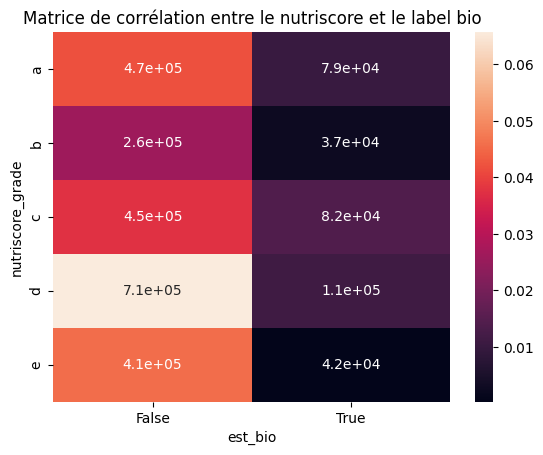

In [61]:
c = cont_1.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.title('Matrice de corrélation entre le nutriscore et le label bio')
plt.show()

In [ ]:
# => Forte corrélation entre nutriscore D et E et le fait que ce soient des produits non-bio?
# => Corrélation entre le nutriscore A et les produits non-bio??

In [67]:
# Observe-t-on une corrélation entre le caratère bio des produits et l'aspect environnemental?
# on enlève les cellules dans la colonne 'ecoscore_grade' qui ont comme valeurs unknown et not-applicable
df_final_ecoscore =  df_final.drop(df_final[(df_final['ecoscore_grade'] == 'unknown') | (df_final['ecoscore_grade'] == 'not-applicable')].index)

,code,quantity_x,serving_size_x,ecoscore_grade,est_plastique,est_palm,est_cocoa,product_name_y,quantity_y,brands_tags_y,...,sugars_100g,proteins_100g,salt_100g,nb_nocif,_merge,product_name,brands_tags,serving_size,est_bio,merge_indicator
0,00000000000026772226,480 g,NaN,d,False,False,False,Skyr,480 g,danone,...,3.9,10.0,0.09,0.0,both,Skyr,danone,NaN,False,both
1,00000000000026772226,480 g,NaN,d,False,False,False,Skyr,480 g,danone,...,3.9,10.0,0.09,0.0,both,Skyr,liberte-canada,serving,False,both
2,00000000000026772226,480 g,NaN,d,False,False,False,Skyr,480 g,danone,...,3.9,10.0,0.09,0.0,both,Skyr,danone,140g,False,both
3,00000000000026772226,480 g,NaN,d,False,False,False,Skyr,480 g,danone,...,3.9,10.0,0.09,0.0,both,Skyr,danone,NaN,False,both
4,00000000000026772226,480 g,NaN,d,False,False,False,Skyr,480 g,danone,...,3.9,10.0,0.09,0.0,both,Skyr,danone,NaN,False,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4209221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Atún Claro en Aceite de Girasol,hacendado,NaN,False,right_only
4209222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Kastanjechampignons,ah,NaN,False,right_only
4209223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Unmistakable Mayo,hellmann-s,NaN,False,right_only
4209224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Ottogi, mushroom cream soup powder",ottogi,1.25 Tbsp (18 g),False,right_only


In [68]:
df_final_ecoscore = df_final_ecoscore.dropna()
df_final_ecoscore

,code,quantity_x,serving_size_x,ecoscore_grade,est_plastique,est_palm,est_cocoa,product_name_y,quantity_y,brands_tags_y,...,sugars_100g,proteins_100g,salt_100g,nb_nocif,_merge,product_name,brands_tags,serving_size,est_bio,merge_indicator
33,0065684107292,500g,serving,d,True,False,False,Skyr,500g,liberte-canada,...,2.857143,10.857143,0.1,0.0,both,Skyr,liberte-canada,serving,False,both
34,0065684107292,500g,serving,d,True,False,False,Skyr,500g,liberte-canada,...,2.857143,10.857143,0.1,0.0,both,Skyr,danone,140g,False,both
37,0065684107292,500g,serving,d,True,False,False,Skyr,500g,liberte-canada,...,2.857143,10.857143,0.1,0.0,both,Skyr,siggi-s,140g,False,both
38,0065684107292,500g,serving,d,True,False,False,Skyr,500g,liberte-canada,...,2.857143,10.857143,0.1,0.0,both,Skyr,danone,1 pot (140g),False,both
39,0065684107292,500g,serving,d,True,False,False,Skyr,500g,liberte-canada,...,2.857143,10.857143,0.1,0.0,both,Skyr,danone,5 cuill�res � caf�,False,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4166308,8717163950043,825 g,15 g (15 Grammes Etat initial),b,False,False,False,Amora Ketchup Légèrement Relevé,825 g,amora,...,20.000000,1.400000,1.8,0.0,both,Amora Ketchup Légèrement Relevé,amora,15 g (15 Grammes Etat initial),False,both
4166516,8718885743166,250 g,50g,b,False,False,False,Pablo s Quinoa revolucion quinoa tricolore,250 g,pablo-s-quinoa,...,7.000000,15.700000,0.0,0.0,both,Pablo s Quinoa revolucion quinoa tricolore,pablo-s-quinoa,50g,True,both
4166552,8719979201593,90 g,30g,d,True,False,False,Nutbar,90 g,2keep,...,36.300000,16.100000,0.0,0.0,both,Nutbar,2keep,30g,False,both
4166763,9002515601452,0.75L e,25ml,c,True,False,False,Pago nectarine citron,0.75L e,pago,...,8.700000,0.500000,0.0,0.0,both,Pago nectarine citron,pago,25ml,False,both


In [69]:
# Création de la table de contingence bio/ecoscore
X = 'ecoscore_grade'
Y = 'est_bio'

cont_2 = df_final_ecoscore[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont_2

est_bio,False,True,Total
ecoscore_grade,,,
a,5711,1604,7315
b,22368,4562,26930
c,19592,2538,22130
d,15941,1435,17376
e,7859,484,8343
Total,71471,10623,82094


In [70]:
# distibution si les variables étaient complétement independantes
tx = cont_2.loc[:,["Total"]]
ty = cont_2.loc[["Total"],:]
n = len(df_final_ecoscore)
indep_2 = round(tx.dot(ty) / n)

In [71]:
indep_2

est_bio,False,True,Total
ecoscore_grade,,,
a,6368.0,947.0,7315.0
b,23445.0,3485.0,26930.0
c,19266.0,2864.0,22130.0
d,15128.0,2248.0,17376.0
e,7263.0,1080.0,8343.0
Total,71471.0,10623.0,82094.0


In [72]:
# où l'écart est le plus important
(cont_2 - indep_2)/indep_2

est_bio,False,True,Total
ecoscore_grade,,,
a,-0.103172,0.693770,0.0
b,-0.045937,0.309039,0.0
c,0.016921,-0.113827,0.0
d,0.053741,-0.361655,0.0
e,0.082060,-0.551852,0.0
Total,0.000000,0.000000,0.0


In [73]:
chi2, p, dof, expected_freq= chi2_contingency(cont_2)

In [74]:
chi2, p

(1664.9838045706183, 0.0)

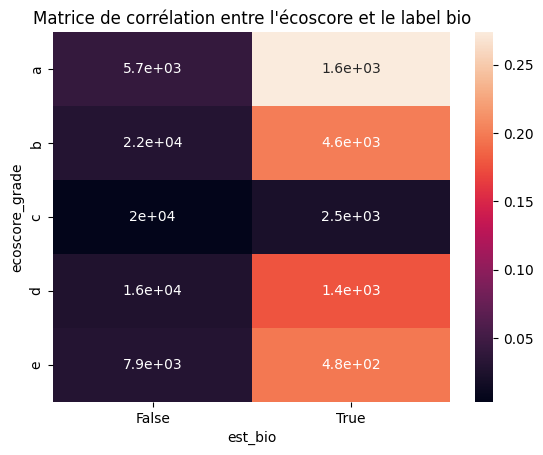

In [75]:
c = cont_2.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep_2)**2/indep_2
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.title("Matrice de corrélation entre l'écoscore et le label bio")
plt.show()

In [ ]:
#=> 

In [76]:
# Création de la table de contingence nutriscore/ecoscore
X = 'ecoscore_grade'
Y = 'nutriscore_grade'

cont_3 = df_final_ecoscore[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont_3

nutriscore_grade,a,b,c,d,e,Total
ecoscore_grade,,,,,,
a,3480,1631,1373,690,141,7315
b,9448,4835,6307,5047,1293,26930
c,3250,2801,5809,6583,3687,22130
d,864,2282,4330,5396,4504,17376
e,686,1478,1220,2170,2789,8343
Total,17728,13027,19039,19886,12414,82094


In [77]:
# Regardons la distibution si les variables étaient complétement independantes
tx = cont_3.loc[:,["Total"]]
ty = cont_3.loc[["Total"],:]
n = len(df_final_ecoscore)
indep_3 = round(tx.dot(ty) / n)

In [78]:
indep_3

nutriscore_grade,a,b,c,d,e,Total
ecoscore_grade,,,,,,
a,1580.0,1161.0,1696.0,1772.0,1106.0,7315.0
b,5815.0,4273.0,6246.0,6523.0,4072.0,26930.0
c,4779.0,3512.0,5132.0,5361.0,3346.0,22130.0
d,3752.0,2757.0,4030.0,4209.0,2628.0,17376.0
e,1802.0,1324.0,1935.0,2021.0,1262.0,8343.0
Total,17728.0,13027.0,19039.0,19886.0,12414.0,82094.0


In [79]:
# l'écart est le plus important
(cont_3 - indep_3)/indep_3

nutriscore_grade,a,b,c,d,e,Total
ecoscore_grade,,,,,,
a,1.202532,0.404823,-0.190448,-0.610609,-0.872514,0.0
b,0.624764,0.131524,0.009766,-0.226276,-0.682466,0.0
c,-0.319941,-0.202449,0.131917,0.227943,0.101913,0.0
d,-0.769723,-0.172289,0.074442,0.282015,0.713851,0.0
e,-0.619312,0.116314,-0.369509,0.073726,1.209984,0.0
Total,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [80]:
chi2, p, dof, expected_freq= chi2_contingency(cont_3)

In [81]:
chi2, p

(16486.41490865255, 0.0)

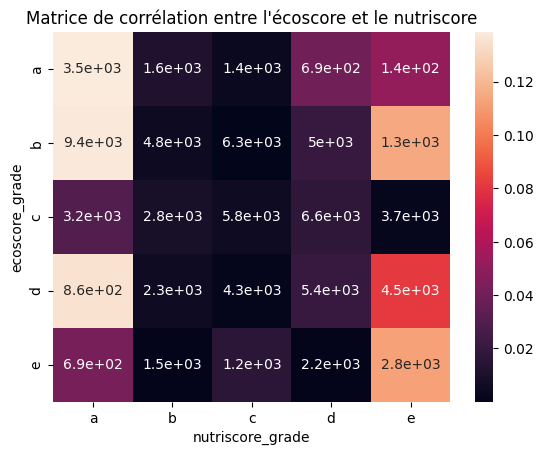

In [82]:
c = cont_3.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep_3)**2/indep_3
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.title("Matrice de corrélation entre l'écoscore et le nutriscore")
plt.show()

In [7]:
# Plotbox pour distribution des produits bio
plt.boxplot(prod_bio.groupby("brands_tags").count()["est_bio"].sort_values(ascending = False))
# => valeur de la Vie Claire qui "écrase" la distribution

NameError: name 'prod_bio' is not defined

In [ ]:
exception = ["la-vie-claire"]

In [ ]:
pbox_prod_bio = prod_bio[~prod_bio.brands_tags.isin(exception)].groupby("brands_tags").count()["est_bio"].sort_values(ascending = False)
plt.boxplot(pbox_prod_bio)